<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB

Dataset Info:
 None

First 5 rows:
    age  gender  miles   debt  income  sales
0   28       0     23      0    4099    620
1   26       0     27      0    2677   1792
2   30       1     58  41576    6215  27754
3   26       1     25  43172    7626  28256
4   20       1     17   6979    8071   4438


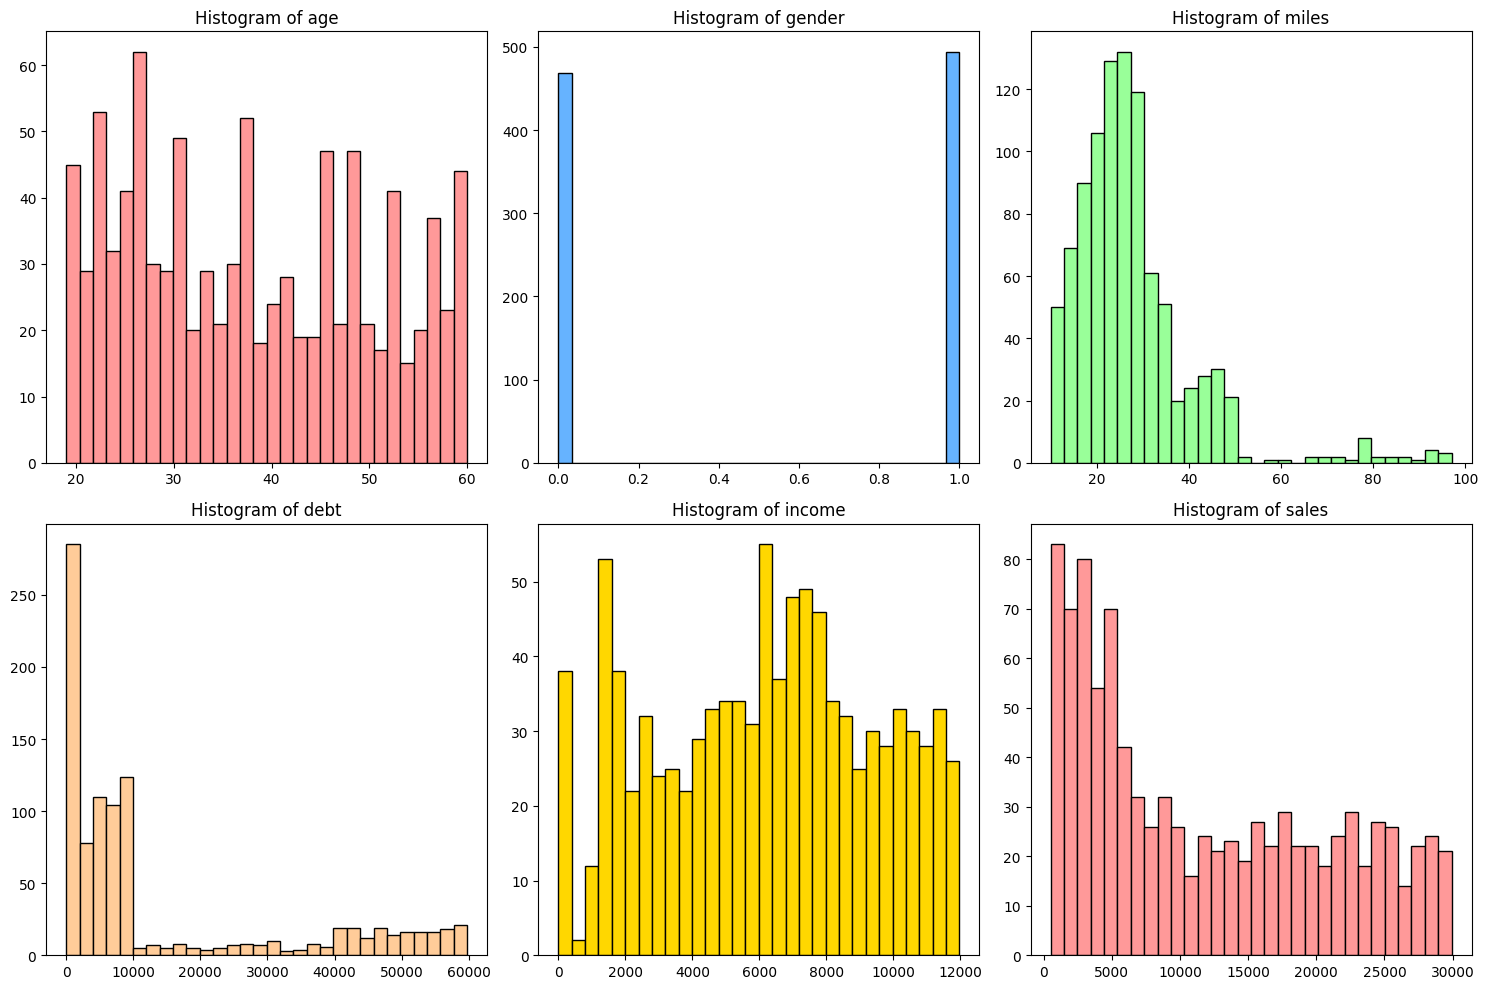

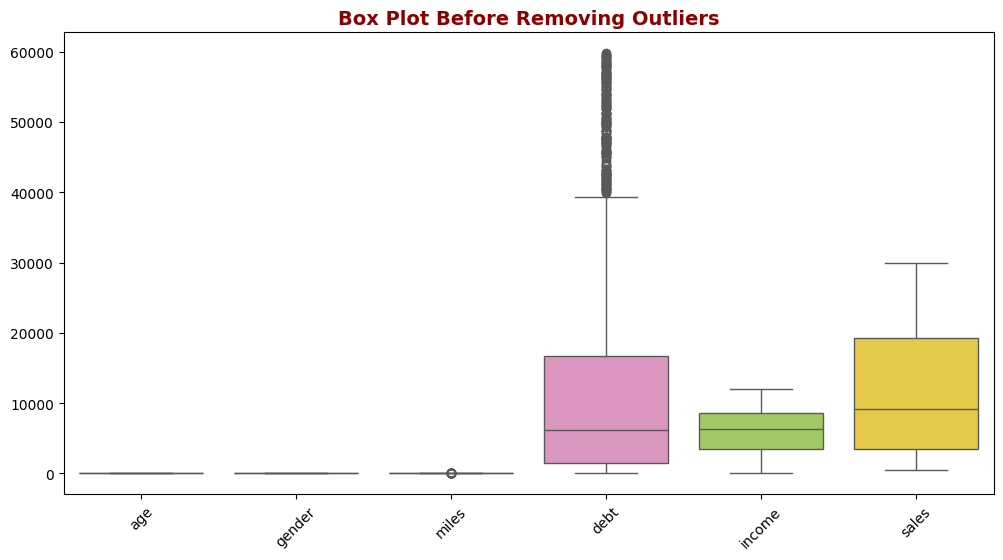

Iteration 1: Remaining samples = 792
Iteration 2: Remaining samples = 710


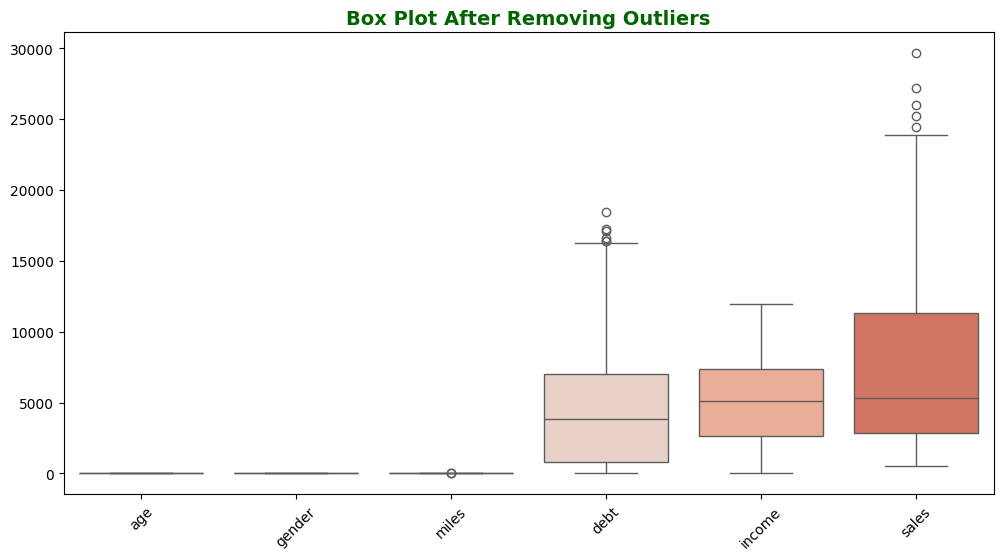

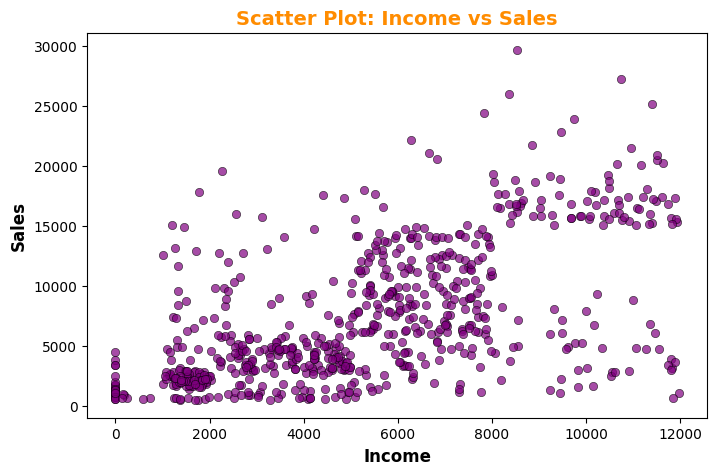

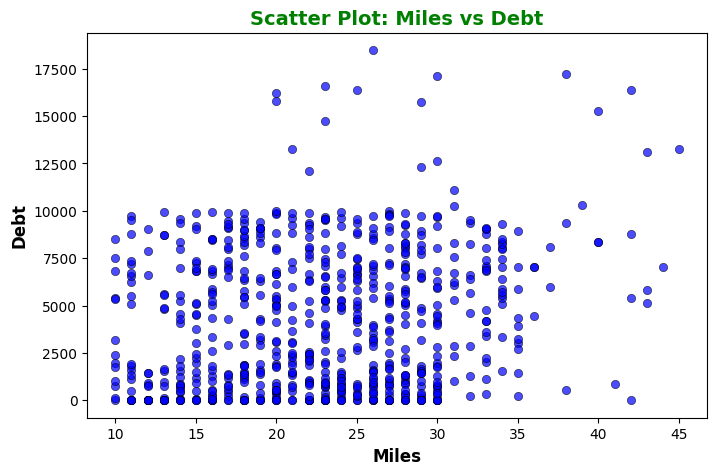


Skewness:
 age       0.388218
gender   -0.096088
miles     0.248740
debt      0.699676
income    0.267711
sales     0.915860
dtype: float64

Kurtosis:
 age      -1.153054
gender   -1.996399
miles    -0.265833
debt      0.101504
income   -0.739962
sales     0.086399
dtype: float64

🔍 Model Evaluation Results:
Linear Regression - MAE: 3175.07, R² Score: 0.54
Random Forest Regressor - MAE: 2711.41, R² Score: 0.60
Support Vector Regressor - MAE: 4061.43, R² Score: 0.24


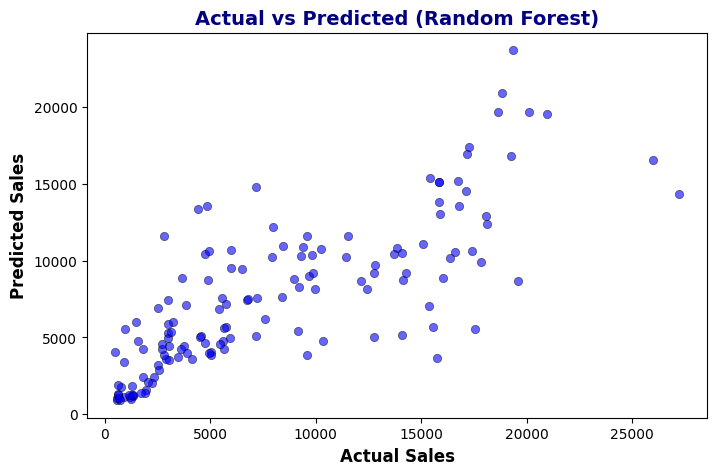

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import math

file_path = "/content/drive/MyDrive/cars_dataset/cars.csv"
df = pd.read_csv(file_path)

print("\nDataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

df['gender'] = df['gender'].astype('category').cat.codes

numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_plots = len(numeric_columns)
rows = math.ceil(num_plots / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
for idx, col in enumerate(numeric_columns):
    axes[idx].hist(df[col], bins=30, color=colors[idx % len(colors)], edgecolor="black")
    axes[idx].set_title(f"Histogram of {col}")

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot Before Removing Outliers", fontsize=14, fontweight="bold", color="darkred")
plt.show()

df_cleaned = df.copy()

for i in range(2):
    Q1 = df_cleaned[numeric_columns].quantile(0.25)
    Q3 = df_cleaned[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[~((df_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) |
                              (df_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"Iteration {i+1}: Remaining samples = {len(df_cleaned)}")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_columns], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot After Removing Outliers", fontsize=14, fontweight="bold", color="darkgreen")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['income'], y=df_cleaned['sales'], color="purple", alpha=0.7, edgecolor="black")
plt.xlabel("Income", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Sales", fontsize=12, fontweight="bold", color="black")
plt.title("Scatter Plot: Income vs Sales", fontsize=14, fontweight="bold", color="darkorange")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['miles'], y=df_cleaned['debt'], color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Miles", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Debt", fontsize=12, fontweight="bold", color="black")
plt.title("Scatter Plot: Miles vs Debt", fontsize=14, fontweight="bold", color="green")
plt.show()

print("\nSkewness:\n", df_cleaned[numeric_columns].skew())
print("\nKurtosis:\n", df_cleaned[numeric_columns].kurtosis())

X = df_cleaned[['gender', 'miles', 'debt', 'income']]
y = df_cleaned['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svr_pred = svr_model.predict(X_test_scaled)

def evaluate_model(model_name, y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - MAE: {mae:.2f}, R² Score: {r2:.2f}")

print("\n🔍 Model Evaluation Results:")
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)
evaluate_model("Support Vector Regressor", y_test, svr_pred)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=rf_pred, color="blue", alpha=0.6, edgecolor="black")
plt.xlabel("Actual Sales", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Predicted Sales", fontsize=12, fontweight="bold", color="black")
plt.title("Actual vs Predicted (Random Forest)", fontsize=14, fontweight="bold", color="navy")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')